In [1]:
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
zip_ref=zipfile.ZipFile("10_food_classes_all_data.zip", "r")
zip_ref.extractall()
zip_ref.close()


--2024-05-22 23:36:48--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.116.207, 142.250.115.207, 142.250.114.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.116.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: '10_food_classes_all_data.zip'

     0K .......... .......... .......... .......... ..........  0%  707K 11m57s
    50K .......... .......... .......... .......... ..........  0% 1.65M 8m29s
   100K .......... .......... .......... .......... ..........  0% 2.25M 6m53s
   150K .......... .......... .......... .......... ..........  0% 3.24M 5m48s
   200K .......... .......... .......... .......... ..........  0% 4.98M 4m58s
   250K .......... .......... .......... .......... ..........  0% 5.93M 4m22s
   300K .......... .......... .......... .......... ..........  0% 3

In [3]:
import os
for dirpath,dirnames,filenames in os.walk('10_food_classes_all_data'):
    print(f'There are{len(dirnames)} directories and {len(filenames)} images in {dirpath}')

There are2 directories and 0 images in 10_food_classes_all_data
There are10 directories and 0 images in 10_food_classes_all_data\test
There are0 directories and 250 images in 10_food_classes_all_data\test\chicken_curry
There are0 directories and 250 images in 10_food_classes_all_data\test\chicken_wings
There are0 directories and 250 images in 10_food_classes_all_data\test\fried_rice
There are0 directories and 250 images in 10_food_classes_all_data\test\grilled_salmon
There are0 directories and 250 images in 10_food_classes_all_data\test\hamburger
There are0 directories and 250 images in 10_food_classes_all_data\test\ice_cream
There are0 directories and 250 images in 10_food_classes_all_data\test\pizza
There are0 directories and 250 images in 10_food_classes_all_data\test\ramen
There are0 directories and 250 images in 10_food_classes_all_data\test\steak
There are0 directories and 250 images in 10_food_classes_all_data\test\sushi
There are10 directories and 0 images in 10_food_classes_al

In [1]:
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

In [2]:
import pathlib
import numpy as np
data_dir=pathlib.Path(train_dir)
class_name=np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_name)


['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen=ImageDataGenerator(rescale=1/255)
test_datagen=ImageDataGenerator(rescale=1/255)

train_data=train_datagen.flow_from_directory(train_dir,
                                             target_size=(224,224),
                                             batch_size=32,
                                             class_mode='categorical')
test_data=test_datagen.flow_from_directory(test_dir,
                                             target_size=(224,224),
                                             batch_size=32,
                                             class_mode='categorical')


Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [10]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Flatten,Dense,Input

model_m1=Sequential([
    Conv2D(10,3,activation='relu',input_shape=(224, 224, 3)),
    Conv2D(10,3,activation='relu'),
    MaxPool2D(),
    Conv2D(10,3,activation='relu'),
    Conv2D(10,3,activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(10,activation='softmax')
])
model_m1.compile(loss='categorical_crossentropy',
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=['accuracy'])

In [11]:
histroy_m1=model_m1.fit(train_data,
                        epochs=5,
                        validation_data=test_data
                        # steps_per_epoch=len(train_data),
                        # validation_steps=len(test_data))
                        )

Epoch 1/5


C:\Users\cangz\Desktop\developer\TensorFlow\TensorFlowPractice\.venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


235/235 ━━━━━━━━━━━━━━━━━━━━ 27s 108ms/step - accuracy: 0.2016 - loss: 2.1749 - val_accuracy: 0.3200 - val_loss: 1.9683
Epoch 2/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 25s 104ms/step - accuracy: 0.3626 - loss: 1.8612 - val_accuracy: 0.3548 - val_loss: 1.8804
Epoch 3/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 24s 102ms/step - accuracy: 0.4684 - loss: 1.5642 - val_accuracy: 0.3340 - val_loss: 1.9312
Epoch 4/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 24s 99ms/step - accuracy: 0.6563 - loss: 1.0627 - val_accuracy: 0.2984 - val_loss: 2.2103
Epoch 5/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 24s 100ms/step - accuracy: 0.8548 - loss: 0.5162 - val_accuracy: 0.2952 - val_loss: 2.9099


In [12]:
model_m1.evaluate(test_data)

79/79 ━━━━━━━━━━━━━━━━━━━━ 4s 48ms/step - accuracy: 0.2897 - loss: 2.8913


[2.9099433422088623, 0.295199990272522]

In [13]:
# Plot the validation and training data separately
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """ 
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

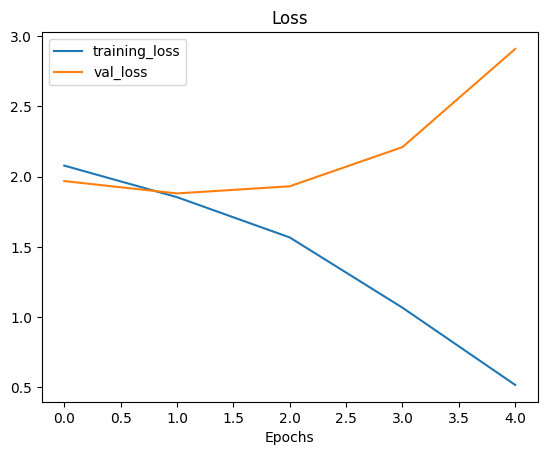

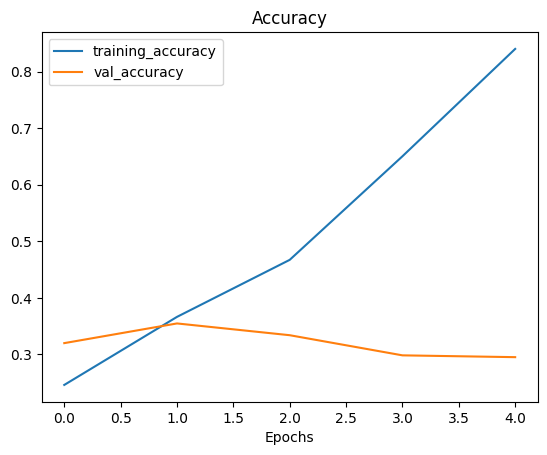

In [14]:
plot_loss_curves(histroy_m1)

In [15]:
model_m2=Sequential([
    Conv2D(10,3,activation='relu',input_shape=(224, 224, 3)),
    MaxPool2D(),
    Conv2D(10,3,activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(10,activation='softmax')
])
model_m2.compile(loss='categorical_crossentropy',
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=['accuracy'])

histroy_m2=model_m2.fit(train_data,
                        epochs=5,
                        validation_data=test_data
                        # steps_per_epoch=len(train_data),
                        # validation_steps=len(test_data))
                        )

Epoch 1/5


C:\Users\cangz\Desktop\developer\TensorFlow\TensorFlowPractice\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


235/235 ━━━━━━━━━━━━━━━━━━━━ 22s 91ms/step - accuracy: 0.1938 - loss: 2.2101 - val_accuracy: 0.3208 - val_loss: 1.9215
Epoch 2/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 20s 83ms/step - accuracy: 0.3932 - loss: 1.7753 - val_accuracy: 0.3564 - val_loss: 1.8532
Epoch 3/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 21s 87ms/step - accuracy: 0.5475 - loss: 1.4260 - val_accuracy: 0.3556 - val_loss: 1.8891
Epoch 4/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 21s 88ms/step - accuracy: 0.7005 - loss: 0.9874 - val_accuracy: 0.3224 - val_loss: 2.1323
Epoch 5/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 22s 91ms/step - accuracy: 0.8562 - loss: 0.5221 - val_accuracy: 0.2952 - val_loss: 2.5644


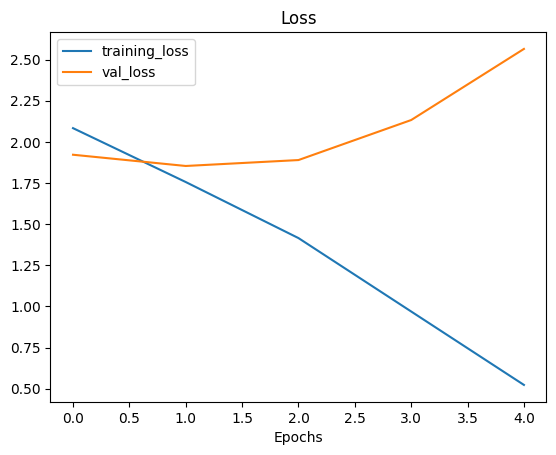

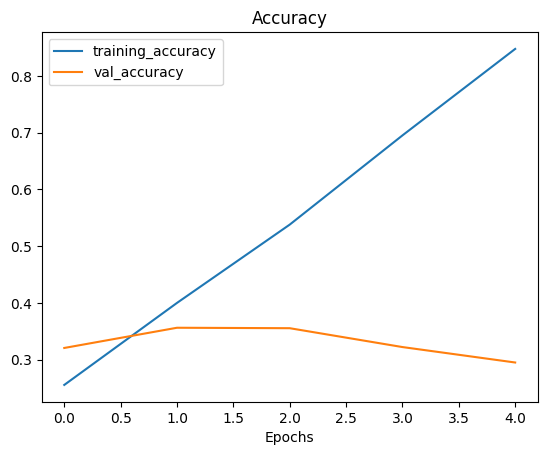

In [16]:
plot_loss_curves(histroy_m2)

In [17]:
train_datagen_augment=ImageDataGenerator(rescale=1/255,
                                         rotation_range=20,
                                         width_shift_range=0.2,
                                         height_shift_range=0.2,
                                         zoom_range=0.2,
                                         horizontal_flip=True)

train_datagen_augment=train_datagen_augment.flow_from_directory(train_dir,
                                                                target_size=(224,224),
                                                                batch_size=32,
                                                                class_mode='categorical')

Found 7500 images belonging to 10 classes.


In [18]:
model_m3=tf.keras.models.clone_model(model_m2)
model_m3.compile(loss='categorical_crossentropy',
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=['accuracy'])

histroy_m3=model_m3.fit(train_datagen_augment,
                        epochs=5,
                        validation_data=test_data
                        # steps_per_epoch=len(train_data_augment),
                        # validation_steps=len(test_data_augment))
                        )

Epoch 1/5


C:\Users\cangz\Desktop\developer\TensorFlow\TensorFlowPractice\.venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


235/235 ━━━━━━━━━━━━━━━━━━━━ 54s 221ms/step - accuracy: 0.1912 - loss: 2.2100 - val_accuracy: 0.2804 - val_loss: 2.0242
Epoch 2/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 56s 234ms/step - accuracy: 0.2885 - loss: 2.0200 - val_accuracy: 0.3628 - val_loss: 1.8477
Epoch 3/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 57s 237ms/step - accuracy: 0.3187 - loss: 1.9575 - val_accuracy: 0.3816 - val_loss: 1.8078
Epoch 4/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 58s 239ms/step - accuracy: 0.3218 - loss: 1.9425 - val_accuracy: 0.3888 - val_loss: 1.8107
Epoch 5/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 59s 247ms/step - accuracy: 0.3518 - loss: 1.9004 - val_accuracy: 0.4112 - val_loss: 1.7599


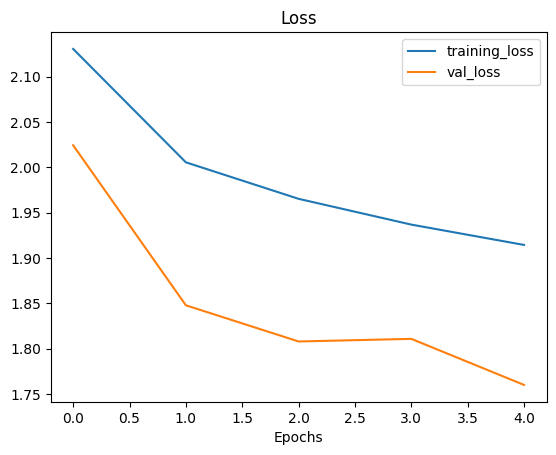

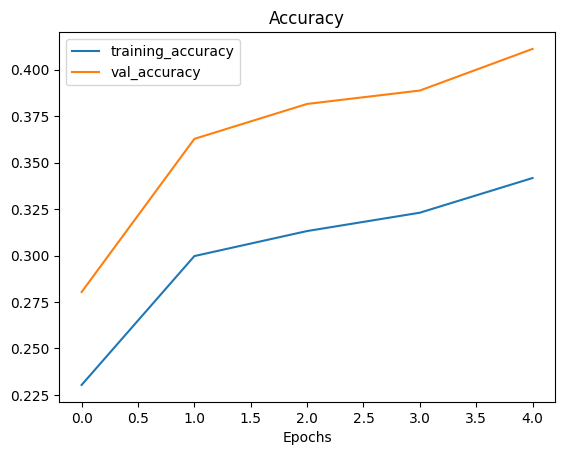

In [20]:
plot_loss_curves(histroy_m3)